<a href="https://colab.research.google.com/github/ikonthomas/Loan_Repayment/blob/master/LoanPred_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from joblib import load
new_featured_data=load('Train.joblib')


In [2]:
new_featured_data.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,good_bad_flag,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,bank_account_type,longitude_gps,latitude_gps,employment_status_clients,Age
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,2,10000.0,15,0.0,1500.0,0.000000,0.000000,0.000000,Savings,3.351667,6.657019,Permanent,30
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,5,30000.0,60,1.0,9000.0,-12500.000000,-4125.000000,-22.500000,Other,3.395230,6.592191,Permanent,40
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,8,20000.0,30,1.0,4500.0,-7142.857143,-2142.857143,-10.714286,Savings,3.306388,6.651843,Permanent,40
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,9,30000.0,60,1.0,9000.0,-13750.000000,-4950.000000,-26.250000,Savings,3.426698,6.423048,Permanent,41
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,3,10000.0,15,1.0,1500.0,0.000000,750.000000,7.500000,Savings,6.976132,4.801001,Permanent,41


In [0]:
#  split the data and import accuracy measures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


In [0]:
# The Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [25]:
Xtraining_features = new_featured_data.drop(["customerid","good_bad_flag",'bank_account_type','employment_status_clients'],axis=1)  #these will be my features

y_label = new_featured_data["good_bad_flag"]
Xtraining_features.head()

,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,longitude_gps,latitude_gps,Age
0,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,2,10000.0,15,1500.0,0.000000,0.000000,0.000000,3.351667,6.657019,30
1,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,5,30000.0,60,9000.0,-12500.000000,-4125.000000,-22.500000,3.395230,6.592191,40
2,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,8,20000.0,30,4500.0,-7142.857143,-2142.857143,-10.714286,3.306388,6.651843,40
3,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,9,30000.0,60,9000.0,-13750.000000,-4950.000000,-26.250000,3.426698,6.423048,41
4,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,3,10000.0,15,1500.0,0.000000,750.000000,7.500000,6.976132,4.801001,41


In [0]:
#split the training and test data
X_train, X_test, y_train, y_test = train_test_split(Xtraining_features, y_label,stratify=y_label,test_size=0.2, random_state=0)

In [27]:
X_train.shape, X_test.shape

((4654, 16), (1164, 16))

In [0]:
def get_model(model,train_X,train_y,test_X,test_y):
    """
    gets a model, for example a RandomForest or a XGBoost etc
    performs training
    measures accuracy 
    shows the confusion matrix
    """
    
    model.fit(train_X,train_y)
    predictions = model.predict(test_X)
    print(model)
    
    print("Accuracy score : ", accuracy_score(predictions,test_y))
    print("mae score : ", mean_absolute_error(predictions,test_y))
    print("Recall score   : ", recall_score(predictions,test_y))
    print("classification report :\n",classification_report(predictions,test_y))
    
    
    # this the confusion matrix
    confusion = confusion_matrix(test_y, predictions)
    sns.heatmap(confusion, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value');
    return None

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy score :  0.6048109965635738
mae score :  0.3951890034364261
Recall score   :  0.6286043829296425
classification report :
               precision    recall  f1-score   support

         0.0       0.33      0.54      0.41       297
         1.0       0.80      0.63      0.70       867

    accuracy                           0.60      1164
   macro avg       0.56      0.58      0.56      1164
weighted avg       0.68      0.60      0.63      1164



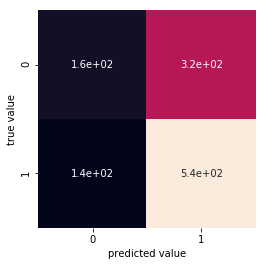

In [38]:
# XGb boost
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05,random_state=1,n_jobs=1)
get_model(xgb, X_train, y_train, X_test, y_test)

In [0]:
# The Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

clf_A = DecisionTreeRegressor()
clf_B = RandomForestClassifier()
clf_C = XGBClassifier()
clf_D = GaussianNB()
clf_E = KNeighborsClassifier()

training_length = len(X_train)
samples_1 = int(training_length * 0.01)
samples_10 = int(training_length * 0.1)
samples_100 = int(training_length * 1)

results = {}
for clf in [clf_A, clf_B, clf_C,clf_D, clf_E]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        (clf, samples, X_train, y_train, X_test, y_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score :  0.6314432989690721
mae score :  0.36855670103092786
Recall score   :  0.6245098039215686
classification report :
               precision    recall  f1-score   support

         0.0       0.20      0.68      0.31       144
         1.0       0.93      0.62      0.75      1020

    accuracy                           0.63      1164
   macro avg       0.57      0.65      0.53      1164
weighted avg       0.84      0.63      0.69      1164



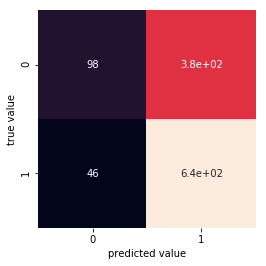

In [39]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

get_model(log, X_train, y_train, X_test, y_test)